In [9]:
from PIL import Image
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

dataRep = '../data/'
datasetRep = '../data/dataset/'
trainImageRep = '../data/train_images/'
scriptRep = '../'

#Import the scripts
import sys
sys.path.insert(1, os.path.abspath(scriptRep))
import kuzushiji_recognition as kr

unicodeData = pd.read_csv(dataRep+'unicode_translation.csv')
trainData = pd.read_csv(dataRep+'train.csv')
sampleSubData = pd.read_csv(dataRep+'sample_submission.csv')

In [4]:
#Parameters Cell

nbImageTrain = 50
xpixel = 1024
ypixel = 1024
minSize=32
fill_color=(255, 255, 255)

In [5]:
#Creation of the dataset

imagesId = trainData.image_id.tolist()
labels = trainData.labels.tolist()
poulpe = list(zip(imagesId,labels))
#print(imagesId)
imageTrain = random.choices(poulpe, weights=None, cum_weights=None, k=nbImageTrain)
trainImagesId, trainLabel = list(zip(*imageTrain))
#print(trainImagesId[0])

In [26]:
#Creation of the training segmentation maps

for i in range(nbImageTrain):
    Im = Image.open(trainImageRep + trainImagesId[i] + '.jpg')
    xIm, yIm = Im.size
    dB = kr.createCaracDatabase(trainLabel[i], unicodeData)
    segMap = kr.createSegmentationMap(xIm, yIm, dB)
    plt.imshow(Im, segMap)

KeyError: 0

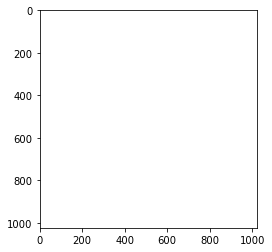

In [8]:
imgSeg3 = Image.new('L', (xpixel, ypixel), 255)
plt.imshow(imgSeg3,cmap='bone',vmin=0, vmax=255)

In [12]:
unicodeData = pd.read_csv(dataRep+'unicode_translation.csv')
kr.createCaracDatabase(trainLabel[0], unicodeData)

,caracter,position,size
0,ル,"(306, 1732)","(35, 21)"
1,一,"(746, 1983)","(80, 25)"
2,は,"(1490, 2205)","(56, 28)"
3,へ,"(1271, 981)","(57, 29)"
4,は,"(1352, 1981)","(57, 30)"
...,...,...,...
239,〱,"(890, 1810)","(62, 141)"
240,〱,"(535, 1311)","(46, 146)"
241,じ,"(439, 1855)","(41, 148)"
242,〱,"(1264, 1052)","(53, 154)"


['U+306F 1231 3465 133 53 U+304C 275 1652 84 69 U+3044 1495 1218 143 69 U+3051 220 3331 53 91 U+306B 911 1452 61 92 U+306B 927 3445 71 92 U+306E 904 2879 95 92 U+5DE5 1168 1396 187 95 U+3053 289 3166 69 97 U+4E09 897 3034 121 107 U+306E 547 1912 141 108 U+3084 1489 2675 151 109 U+3068 1561 2979 55 116 U+5DF1 1513 2500 127 117 U+3082 1213 1523 72 119 U+3055 1219 3266 95 124 U+306E 259 2230 68 125 U+306E 1184 2423 169 125 U+4E16 849 2236 163 127 U+7D30 1144 1212 200 128 U+305D 316 3287 57 133 U+4EBA 217 2044 183 135 U+3051 277 2974 112 137 U+308C 201 3423 181 137 U+3060 243 2830 159 143 U+5F37 1479 2034 163 145 U+306E 1497 1567 123 152 U+305F 1164 952 145 153 U+3066 552 1199 97 155 U+4FF3 537 2095 176 155 U+6839 203 1439 184 156 U+304B 1188 2606 156 157 U+8AE7 549 2328 156 159 U+308C 1495 2784 168 159 U+5B50 891 1255 100 164 U+3092 584 2546 117 164 U+53CA 849 1588 151 164 U+8005 1192 2198 133 169 U+305A 889 1763 103 171 U+907F 513 945 181 171 U+6B63 539 1439 136 172 U+6587 192 2382 216 1